In [1]:
import glob

import xarray as xr
import dask.diagnostics
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cmocean
from IPython.display import Image

import spatial_selection

In [2]:
dask.diagnostics.ProgressBar().register()

In [3]:
agcd_v2_files = glob.glob(f'/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_*.nc')
agcd_v2_files.sort()
agcd_v2_files

['/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1900.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1901.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1902.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1903.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1904.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1905.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1906.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1907.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1908.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthly_1909.nc',
 '/g/data/zv2/agcd/v2/precip/total/r005/01month/agcd_v2_precip_total_r005_monthl

In [4]:
agcd_v2_ds = xr.open_mfdataset(agcd_v2_files)
agcd_v2_ds = agcd_v2_ds.sel(time=slice('1981-01-01', '2010-12-31'))
agcd_v2_annual_totals = agcd_v2_ds.resample({'time': 'A'}).sum('time', keep_attrs=True)
agcd_v2_annual_clim = agcd_v2_annual_totals.mean('time', keep_attrs=True)
agcd_v2_annual_clim = agcd_v2_annual_clim['precip'].compute()

[########################################] | 100% Completed |  7.0s


In [5]:
agcd_v1m_files = glob.glob(f'/g/data/zv2/agcd/v1/precip/total/r005/01month/agcd_v1_precip_total_r005_monthly_*.nc')
agcd_v1m_files.sort()
agcd_v1m_files

['/g/data/zv2/agcd/v1/precip/total/r005/01month/agcd_v1_precip_total_r005_monthly_1900.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01month/agcd_v1_precip_total_r005_monthly_1901.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01month/agcd_v1_precip_total_r005_monthly_1902.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01month/agcd_v1_precip_total_r005_monthly_1903.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01month/agcd_v1_precip_total_r005_monthly_1904.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01month/agcd_v1_precip_total_r005_monthly_1905.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01month/agcd_v1_precip_total_r005_monthly_1906.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01month/agcd_v1_precip_total_r005_monthly_1907.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01month/agcd_v1_precip_total_r005_monthly_1908.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01month/agcd_v1_precip_total_r005_monthly_1909.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01month/agcd_v1_precip_total_r005_monthl

In [6]:
agcd_v1m_ds = xr.open_mfdataset(agcd_v1m_files)
agcd_v1m_ds = agcd_v1m_ds.sel(time=slice('1981-01-01', '2010-12-31'))
agcd_v1m_annual_totals = agcd_v1m_ds.resample({'time': 'A'}).sum('time', keep_attrs=True)
agcd_v1m_annual_clim = agcd_v1m_annual_totals.mean('time', keep_attrs=True)
agcd_v1m_annual_clim = agcd_v1m_annual_clim['precip'].compute()

[########################################] | 100% Completed |  7.0s


In [7]:
agcd_v1d_files = glob.glob(f'/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_*.nc')
agcd_v1d_files.sort()
agcd_v1d_files

['/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1900.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1901.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1902.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1903.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1904.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1905.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1906.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1907.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1908.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1909.nc',
 '/g/data/zv2/agcd/v1/precip/total/r005/01day/agcd_v1_precip_total_r005_daily_1910.nc',
 '/g/data/zv2/agcd/v1/precip/tot

In [8]:
agcd_v1d_ds = xr.open_mfdataset(agcd_v1d_files)
agcd_v1d_ds = agcd_v1d_ds.sel(time=slice('1981-01-01', '2010-12-31'))
agcd_v1d_annual_totals = agcd_v1d_ds.resample({'time': 'A'}).sum('time', keep_attrs=True)
agcd_v1d_annual_clim = agcd_v1d_annual_totals.mean('time', keep_attrs=True)
agcd_v1d_annual_clim = agcd_v1d_annual_clim['precip'].compute()

[########################################] | 100% Completed |  2min 31.5s


In [9]:
agcd_csiro_files = glob.glob(f'/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_*_daily.nc')
agcd_csiro_files.sort()
agcd_csiro_files

['/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19000101-19001231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19010101-19011231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19020101-19021231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19030101-19031231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19040101-19041231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19050101-19051231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19060101-19061231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19070101-19071231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19080101-19081231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19090101-19091231_daily.nc',
 '/g/data/xv83/agcd-csiro/precip/precip-total_AGCD-CSIRO_r005_19100101-19101231_daily.nc',

In [10]:
agcd_csiro_ds = xr.open_mfdataset(agcd_csiro_files)
agcd_csiro_ds = agcd_csiro_ds.sel(time=slice('1981-01-01', '2010-12-31'))
agcd_csiro_annual_totals = agcd_csiro_ds.resample({'time': 'A'}).sum('time', keep_attrs=True)
agcd_csiro_annual_clim = agcd_csiro_annual_totals.mean('time', keep_attrs=True)
agcd_csiro_annual_clim = agcd_csiro_annual_clim['precip'].compute()

[########################################] | 100% Completed |  2min 16.8s


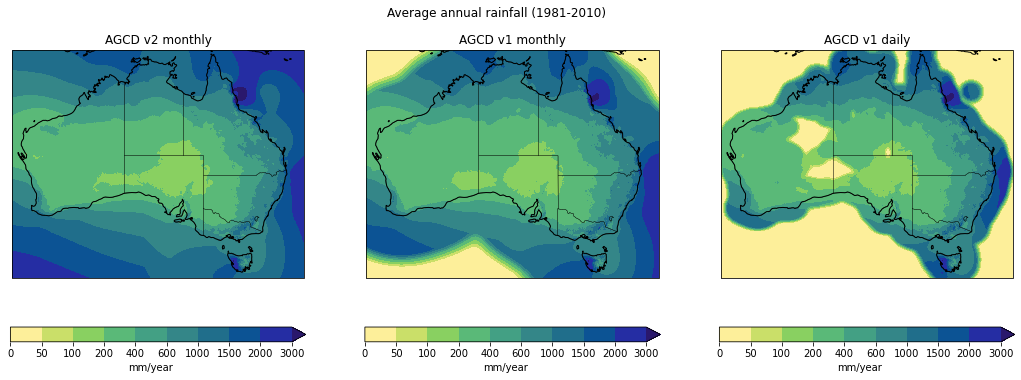

In [22]:
fig = plt.figure(figsize=[18, 6])

levels = [0, 50, 100, 200, 400, 600, 1000, 1500, 2000, 3000]

ax1 = fig.add_subplot(131, projection=ccrs.PlateCarree())
agcd_v2_annual_clim.plot(
    ax=ax1,
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.haline_r,
    levels=levels,
    extend='max',
    cbar_kwargs = {'orientation': 'horizontal', 'label': 'mm/year'}
)
ax1.set_title('AGCD v2 monthly')

ax2 = fig.add_subplot(132, projection=ccrs.PlateCarree())
agcd_v1m_annual_clim.plot(
    ax=ax2,
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.haline_r,
    levels=levels,
    extend='max',
    cbar_kwargs = {'orientation': 'horizontal', 'label': 'mm/year'}
)
ax2.set_title('AGCD v1 monthly')

ax3 = fig.add_subplot(133, projection=ccrs.PlateCarree())
agcd_v1d_annual_clim.plot(
    ax=ax3,
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.haline_r,
    levels=levels,
    extend='max',
    cbar_kwargs = {'orientation': 'horizontal', 'label': 'mm/year'}
)
ax3.set_title('AGCD v1 daily')

#ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree())
#agcd_csiro_annual_clim.plot(
#    ax=ax4,
#    transform=ccrs.PlateCarree(),
#    cmap=cmocean.cm.haline_r,
#    levels=levels,
#    extend='max',
#    cbar_kwargs = {'orientation': 'horizontal', 'label': 'mm/year'}
#)
#ax4.set_title('AGCD CSIRO daily')

for ax in [ax1, ax2, ax3]:
    ax.coastlines()
    ax.add_feature(cartopy.feature.STATES, linewidth=0.3)

plt.suptitle('Average annual rainfall (1981-2010)')
plt.savefig(
    '/g/data/xv83/dbi599/pr_AGCD_1981-2010_annual-mean.png',
    bbox_inches='tight',
    facecolor='white',
    dpi=300,
)

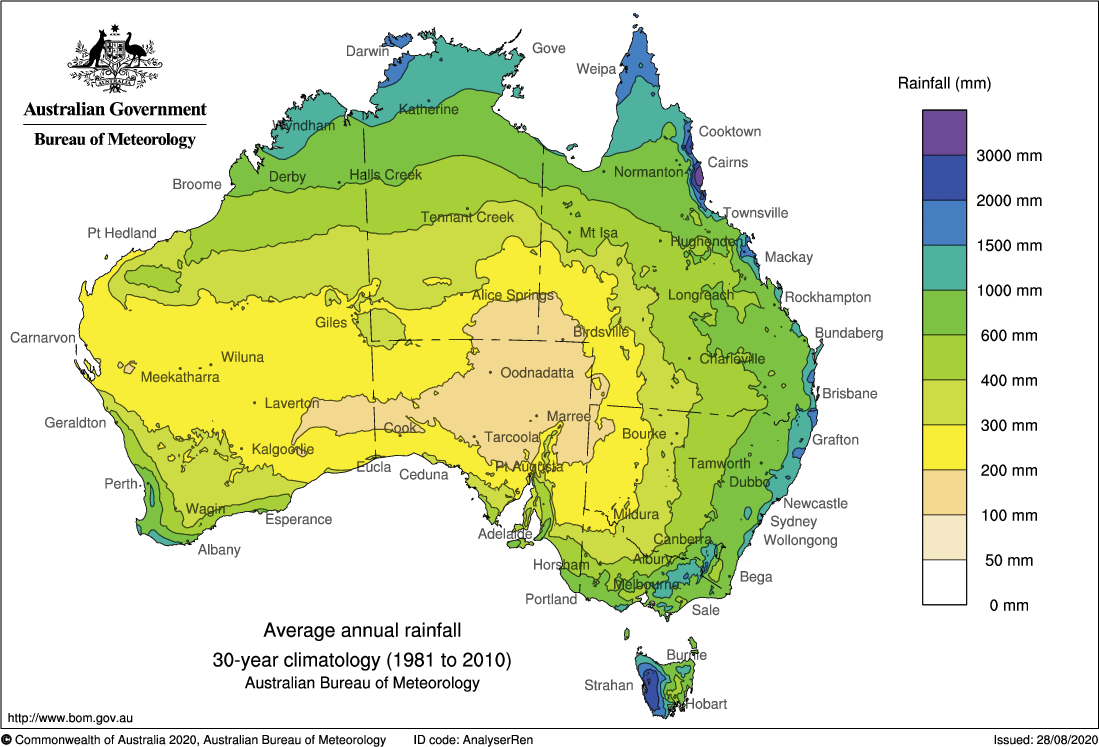

In [22]:
Image(filename='/home/599/dbi599/Downloads/rainfall_clim.png')